In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.isnull()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1021,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1022,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1023,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [4]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
data_dup = data.duplicated().any()

In [6]:
data_dup

True

In [7]:
data = data.drop_duplicates()

In [8]:
data_dup = data.duplicated().any()

In [9]:
data_dup

False

In [13]:
cate_val = []
cont_val = []

for column in data.columns:
    if data[column].nunique() <= 10:
        cate_val.append(column)
    else:
        cont_val.append(column)


In [14]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [15]:
cont_val

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [16]:
cate_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
data['cp'].unique()

array([0, 1, 2, 3])

In [18]:
cate_val.remove('sex')
cate_val.remove('target')
data= pd.get_dummies(data,columns=cate_val,drop_first=True)

In [19]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [20]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,52,1,125,212,168,1.0,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,53,1,140,203,155,3.1,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,70,1,145,174,125,2.6,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,61,1,148,203,161,0.0,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,62,0,138,294,106,1.9,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [21]:
from sklearn.preprocessing import StandardScaler

In [25]:
st = StandardScaler()
data[cont_val] = st.fit_transform(data[cont_val])

In [26]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [29]:
X = data.drop('target',axis=1)

In [30]:
 X

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,False,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,False,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,False,False,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,1.503322,0,-0.661712,-0.687083,-1.511859,0.394086,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
733,-1.153610,0,-1.346085,-2.041893,1.112172,-0.382092,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
843,0.506972,1,1.619532,0.512893,-1.074521,-0.899544,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


In [31]:
y=data['target']

In [32]:
y

0      0
1      0
2      0
3      0
4      0
      ..
723    1
733    1
739    0
843    0
878    0
Name: target, Length: 302, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
163,-0.710788,1,-0.433587,0.532247,0.718568,-0.468334,False,False,False,False,...,False,True,False,False,False,False,False,False,False,True
291,0.396267,1,-0.205463,0.241930,-0.855851,1.687716,False,False,False,False,...,True,True,False,False,True,False,False,False,False,True
280,-1.042904,0,-0.091401,-0.241930,1.112172,-0.382092,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
85,-1.153610,1,-0.661712,-0.512893,0.893503,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
239,0.839089,0,1.049221,-0.048386,0.193761,0.307844,False,False,False,False,...,True,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,1.392616,1,-0.661712,-0.183867,-3.436149,-0.037124,False,False,False,False,...,False,True,False,False,False,False,False,False,True,False
77,0.949794,1,0.478910,-1.151589,-0.243577,2.550136,False,False,False,False,...,True,False,True,False,True,False,False,False,False,True
125,0.617678,0,1.049221,-0.125804,0.937237,-0.123366,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False
522,1.392616,0,1.163283,0.590310,0.980971,-0.899544,False,True,False,False,...,False,False,True,True,False,False,False,False,True,False


In [36]:
X_test

,age,sex,trestbps,chol,thalach,oldpeak,cp_1,cp_2,cp_3,fbs_1,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
245,-1.153610,1,-0.091401,-0.532247,1.680713,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
349,0.839089,0,-0.091401,0.319348,-2.299069,0.135360,False,True,False,False,...,False,True,False,True,False,False,False,False,False,True
135,0.396267,0,2.189843,-0.416120,-0.156110,1.515232,False,False,False,True,...,True,True,False,False,True,False,False,True,False,False
389,0.949794,1,0.764066,-0.261285,0.018826,1.084022,False,False,True,True,...,False,False,False,False,False,False,False,True,False,False
66,-0.157260,1,-0.091401,-0.958045,0.106294,0.135360,False,True,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1.391408,-0.029032,-0.287311,-0.899544,True,False,False,False,...,False,False,True,False,False,False,False,False,True,False
123,1.171205,0,0.478910,3.299932,0.324963,-0.209608,False,True,False,True,...,False,False,True,True,False,False,False,False,True,False
739,-0.267966,1,-0.205463,0.164513,0.499898,-0.899544,False,False,False,False,...,True,False,True,True,False,False,False,False,False,True
274,1.281911,1,1.619532,-0.358057,-0.505981,1.084022,False,False,False,False,...,False,False,True,False,False,False,False,True,False,False


In [37]:
y_train

163    0
291    0
280    1
85     1
239    0
      ..
267    0
77     0
125    1
522    1
119    1
Name: target, Length: 241, dtype: int64

In [38]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

In [39]:
data.head()

,age,sex,trestbps,chol,thalach,oldpeak,target,cp_1,cp_2,cp_3,...,exang_1,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3
0,-0.267966,1,-0.376556,-0.667728,0.806035,-0.037124,0,False,False,False,...,False,False,True,False,True,False,False,False,False,True
1,-0.157260,1,0.478910,-0.841918,0.237495,1.773958,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
2,1.724733,1,0.764066,-1.403197,-1.074521,1.342748,0,False,False,False,...,True,False,False,False,False,False,False,False,False,True
3,0.728383,1,0.935159,-0.841918,0.499898,-0.899544,0,False,False,False,...,False,False,True,True,False,False,False,False,False,True
4,0.839089,0,0.364848,0.919336,-1.905464,0.739054,0,False,False,False,...,False,True,False,False,False,True,False,False,True,False


In [40]:
from sklearn.linear_model import LogisticRegression

In [42]:
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [46]:
y_pred1 = log.predict(X_test)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred1)

0.7868852459016393

In [49]:
from sklearn import svm

In [50]:
svm= svm.SVC()

In [51]:
svm.fit(X_train,y_train)

SVC()

In [52]:
y_pred2 = svm.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred2)

0.8032786885245902

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [55]:
knn = KNeighborsClassifier()

In [56]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [57]:
y_pred3=knn.predict(X_test)

In [58]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

score = []

for k in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    score.append(accuracy_score(y_test, y_pred))


In [61]:
score

[0.7213114754098361,
 0.8032786885245902,
 0.7049180327868853,
 0.7049180327868853,
 0.7377049180327869,
 0.8032786885245902,
 0.7868852459016393,
 0.8032786885245902,
 0.7704918032786885,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7540983606557377,
 0.7704918032786885,
 0.7540983606557377,
 0.7540983606557377,
 0.7377049180327869,
 0.7540983606557377,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869]

In [68]:

    knn = KNeighborsClassifier(n_neighbors=2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    (accuracy_score(y_test, y_pred))


0.8032786885245902

In [69]:
data = pd.read_csv('heart.csv')

In [70]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [71]:
data = data.drop_duplicates()

In [72]:
data.shape

(302, 14)

In [74]:
X= data.drop('target',axis=1)
y= data['target']

In [110]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [111]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
dt = DecisionTreeClassifier()

In [118]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [120]:
y_pred4= dt.predict(X_test)

In [121]:
accuracy_score(y_test,y_pred4)

0.7868852459016393

In [122]:
from sklearn.ensemble import RandomForestClassifier

In [123]:
rf = RandomForestClassifier()

In [124]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [125]:
y_pred5= rf.predict(X_test)

In [127]:
accuracy_score(y_test,y_pred5)

0.8360655737704918

In [130]:
from sklearn.ensemble import GradientBoostingClassifier

In [131]:
gdc = GradientBoostingClassifier()

In [132]:
gdc.fit(X_train,y_train)

GradientBoostingClassifier()

In [133]:
y_pred6= gdc.predict(X_test)

In [134]:
accuracy_score(y_test,y_pred6)

0.819672131147541

In [137]:
import pandas as pd

final_data = pd.DataFrame({
    'Models': ['LR', 'SVM', 'KNN', 'DT', 'RF', 'GB'],
    'ACC': [
        accuracy_score(y_test, y_pred1),
        accuracy_score(y_test, y_pred2),
        accuracy_score(y_test, y_pred3),
        accuracy_score(y_test, y_pred4),
        accuracy_score(y_test, y_pred5),
        accuracy_score(y_test, y_pred6)
    ]
})


In [138]:
final_data

,Models,ACC
0,LR,0.786885
1,SVM,0.803279
2,KNN,0.737705
3,DT,0.786885
4,RF,0.836066
5,GB,0.819672


In [141]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

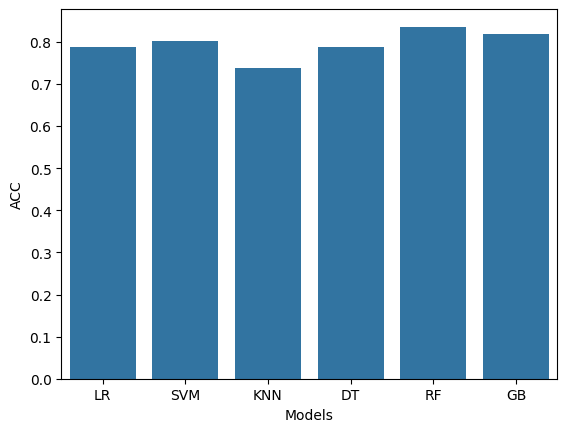

In [143]:
sns.barplot(x='Models', y='ACC', data=final_data)


In [144]:
X= data.drop('target',axis=1)
y= data['target']

In [145]:
X.shape

(302, 13)

In [149]:
from sklearn.ensemble import RandomForestClassifier

In [150]:
rf = RandomForestClassifier()
rf.fit(X,y)

RandomForestClassifier()

In [162]:
import pandas as pd

In [171]:
new_data = pd.DataFrame ({
    'age': [52],
    'sex': [1],
    'cp': [0],
    'trestbps': [125],  # Corrected column name
    'chol': [213],
    'fbs': [0],
    'restecg': [1],
    'thalach': [163],
    'exang': [0],
    'oldpeak': [1.0],
    'slope': [2],
    'ca': [3],
    'thal': [3],
})


In [174]:
new_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,213,0,1,163,0,1.0,2,3,3


In [175]:
rf.predict(new_data)

array([0])

In [176]:
p = rf.predict(new_data)
if p[0] == 0:
    print("No Disease")
else:
    print("Disease")


No Disease


In [205]:
import joblib

In [206]:
joblib.dump(rf,'model_joblib_heart')

['model_joblib_heart']

In [207]:
model = joblib.load('model_joblib_heart')

In [208]:
model.predict(new_data)

array([0])

In [209]:
import tkinter as tk
import joblib


In [220]:
from tkinter import *
import joblib

def show_entry_fields():
    try:
        pl = int(entry_age.get())
        p2 = int(entry_sex.get())
        p3 = int(entry_cp.get())
        p4 = int(entry_trestbps.get())
        p5 = int(entry_chol.get())
        p6 = int(entry_fbs.get())
        p7 = int(entry_restecg.get())
        p8 = int(entry_thalach.get())
        p9 = int(entry_exang.get())
        p10 = float(entry_oldpeak.get())
        p11 = int(entry_slope.get())
        p12 = int(entry_ca.get())
        p13 = int(entry_thal.get())
        
        model = joblib.load('model_joblib_heart')
        
        result = model.predict([[pl, p2, p3, p4, p5, p6, p7, p8, p9, p10, p11, p12, p13]])
        
        if result == 0:
            result_label.config(text="No Heart Diseases")
        else:
            result_label.config(text="Possibility of Heart Diseases")
    except ValueError:
        result_label.config(text="Invalid input. Please enter valid values.")

master = Tk()
master.title("Heart Diseases Prediction System")

label = Label(master, text="Heart Diseases Prediction System", bg="black", fg="white")
label.grid(row=0, columnspan=2, pady=10)

# Labels and entry widgets for all features
features = [
    "Enter Your Age:", "Male Or Female [1/0]:", "Enter Value of CP:", "Enter Value of trestbps:",
    "Enter Value of chol:", "Enter Value of fbs:", "Enter Value of restecg:",
    "Enter Value of thalach:", "Enter Value of exang:", "Enter Value of oldpeak:",
    "Enter Value of slope:", "Enter Value of ca:", "Enter Value of thal:"
]

entry_widgets = []

for i, feature in enumerate(features):
    label = Label(master, text=feature)
    label.grid(row=i+1, column=0, sticky="e", padx=10, pady=5)
    
    entry = Entry(master)
    entry.grid(row=i+1, column=1, padx=10, pady=5)
    entry_widgets.append(entry)
    
# Assigning entry widgets to specific variables
entry_age = entry_widgets[0]
entry_sex = entry_widgets[1]
entry_cp = entry_widgets[2]
entry_trestbps = entry_widgets[3]
entry_chol = entry_widgets[4]
entry_fbs = entry_widgets[5]
entry_restecg = entry_widgets[6]
entry_thalach = entry_widgets[7]
entry_exang = entry_widgets[8]
entry_oldpeak = entry_widgets[9]
entry_slope = entry_widgets[10]
entry_ca = entry_widgets[11]
entry_thal = entry_widgets[12]

submit_button = Button(master, text="Submit", command=show_entry_fields)
submit_button.grid(row=len(features)+1, columnspan=2, pady=10)

result_label = Label(master, text="", fg="blue")
result_label.grid(row=len(features)+2, columnspan=2, pady=10)

mainloop()
